In [15]:
debug = False

In [16]:
from PIL import Image
import numpy as np

In [17]:
from pprint import pprint
from ipywidgets import widgets
from ipywidgets.widgets import interact
from IPython.display import display

In [18]:
import matplotlib.image as mpimg

In [19]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [20]:
%matplotlib notebook

# Select working data set

In [21]:
%gui qt

In [22]:
from PyQt4 import QtCore, QtGui

def gui_fname(dir=None):
    """Select a file via a dialog and returns the file name."""
    if dir is None: dir ='./'
    fname = QtGui.QFileDialog.getOpenFileNames(None, "Select file...", 
                                            dir, 
                                            filter = "TIF (*.tif);; All files (*)")
    return fname

In [23]:
# Default folder
default_dir = '/Volumes/Macintosh HD 2/IPTS/TOF_Si_powder'

In [24]:
# Select the entire set of data (to be able to match data with tof axis)
%gui qt
list_fname = gui_fname(dir = default_dir)

Make sure files are sorted the right way !

In [ ]:
if debug:
    pprint(list_fname)
    print()
    pprint("Loaded %d files" %(len(list_fname)))

Load images

In [25]:
nbr_images = len(list_fname)
images = []

w = widgets.IntProgress()
w.max = nbr_images
display(w)

for _index in range(nbr_images):
        
        _file = list_fname[_index]
#        _image = mpimg.imread(_file)
        _image = Image.open(_file)
        _image = np.asarray(_image)
        images.append(_image)

        w.value = _index
    

# Keep only range of images that have an interest

In [26]:
%matplotlib inline

[100, 1311]

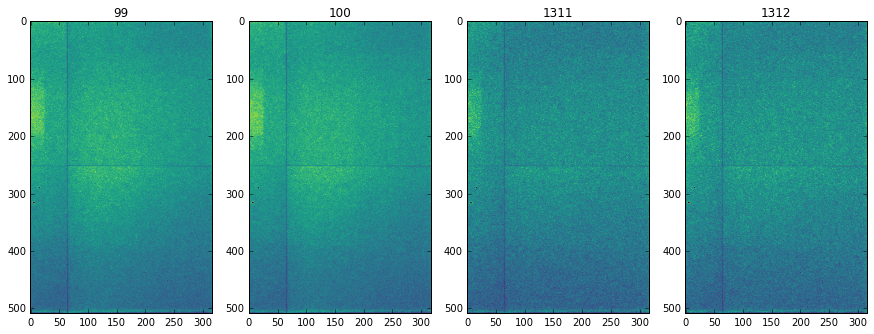

In [27]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_keep(file_index_start, file_index_end, keep_everything):
    """displays the first image excluded and kept, and the last image kept and excluded"""
    
    _data1_out = images[file_index_start - 1]
    _data1_in = images[file_index_start]
    
    _data2_in = images[file_index_end]
    _data2_out = images[file_index_end + 1]

    fig3 = plt.figure(figsize=(15, 50))

    ax_img1_out = plt.subplot(141)
    ax_img1_out.imshow(_data1_out, cmap='viridis')
    ax_img1_out.set_title("%d" %(file_index_start - 1))
    #ax_img1_out.set_title("Last image excluded: %s" %list_fname[file_index_start - 1])

    ax_img1_in = plt.subplot(142)
    ax_img1_in.imshow(_data1_in, cmap='viridis')
    ax_img1_in.set_title("%d" %(file_index_start))
    #ax_img1_in.set_title(list_fname[file_index_start - 1])

    ax_img2_in = plt.subplot(143)
    ax_img2_in.imshow(_data2_in, cmap='viridis')
    ax_img2_in.set_title("%d" %(file_index_end))
    #ax_img2_out.set_title("Last image excluded: %s" %list_fname[file_index_end])

    ax_img2_out = plt.subplot(144)
    ax_img2_out.imshow(_data2_out, cmap='viridis')
    ax_img2_out.set_title("%d" %(file_index_end + 1))
    #ax_img2_in.set_title(list_fname[file_index_end + 1])

    if keep_everything:
        file_index_start = 0
        file_index_end = len(images)-1
    
    return [file_index_start, file_index_end]
    
file_range = interact(plot_images_to_keep,
               file_index_start = widgets.IntSlider(min=0, max=nbr_images, step=1, value=100, description='First Image to Keep'),
               file_index_end = widgets.IntSlider(min=0, max=nbr_images, step=1, value=1311, description='First Image to Keep'),
                keep_everything = widgets.Checkbox(value=False, description='Keep Everything'))


In [28]:
[file_index_start, file_index_end] = file_range.widget.result

## Define new arrays of images, list file names 

In [29]:
print("Index first image to keep: %d" %file_index_start)
print("Index last image to keep: %d" %file_index_end)
print("")
print("Name first image to keep: %s" %list_fname[file_index_start])
print("Name last image to keep: %s" %list_fname[file_index_end])
print("")
print("Before, we had %d" %len(images))

# new working range of images
new_images = images[file_index_start: file_index_end]
print("After, we have %d" %len(new_images))

# new working name of images
new_list_fname = list_fname[file_index_start: file_index_end]



Index first image to keep: 100
Index last image to keep: 1311

Name first image to keep: /Volumes/Macintosh HD 2/IPTS/TOF_Si_powder/Corrected_Sum_Images0100.tif
Name last image to keep: /Volumes/Macintosh HD 2/IPTS/TOF_Si_powder/Corrected_Sum_Images1311.tif

Before, we had 1485
After, we have 1211


# Normalize images


    raw_pixel = I
    ob_pixel = I0

    normalize_image =  (I - I0) / (I0)

### OB is part of the image

[[10, 50, 30, 478], [100, 267, 30, 478]]

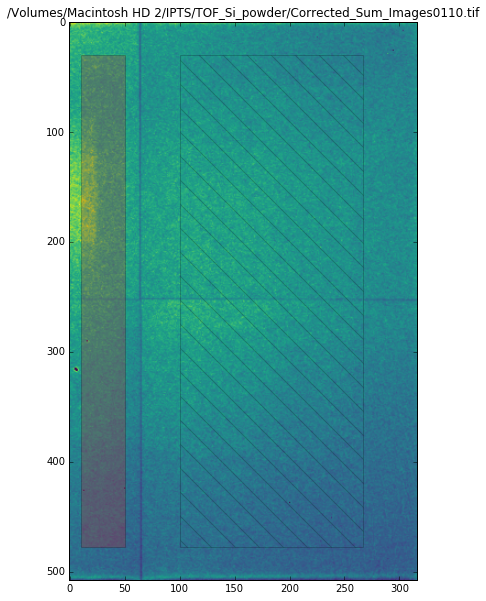

In [30]:
[height, width] = images[0].shape
    
# select Sample region
def plot_images_to_select_ob_sample_regions(file_index, 
                                        ob_left, ob_right, ob_top, ob_bottom,
                                        s_left, s_right, s_top, s_bottom):

    _data = new_images[file_index]

    fig1 = plt.figure(figsize=(10, 10))
    ax_img = plt.subplot(111)

    ax_img.imshow(_data, cmap='viridis')
    ax_img.set_title(new_list_fname[file_index])

    ax_img.add_patch(Rectangle((ob_left, ob_bottom), (ob_right-ob_left), (ob_top-ob_bottom), 
                               fill=True, 
#                               hatch='\\',,
                               alpha=0.2,
                              facecolor='red'))

    ax_img.add_patch(Rectangle((s_left, s_bottom), (s_right - s_left), (s_top - s_bottom), 
                              fill = False,
                               hatch = '\\',
                              alpha = 0.2,
                              facecolor = 'blue'))

    return [[ob_left, ob_right, ob_top, ob_bottom], [s_left, s_right, s_top, s_bottom]]


crop = interact(plot_images_to_select_ob_sample_regions,
               file_index = widgets.IntSlider(min=0, max=len(new_list_fname), step=1, value=10, description='Image Index'),

            ob_left = widgets.IntSlider(min=0, max=width, step=1, value=10, description='left OB'),
           ob_right = widgets.IntSlider(min=0, max=width, step=1, value=50, description='right OB'),
           ob_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top OB'),
           ob_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom OB'),

            s_left = widgets.IntSlider(min=0, max=width, step=1, value=100, description='left sample'),
           s_right = widgets.IntSlider(min=0, max=width, step=1, value=width-50, description='right sample'),
           s_top = widgets.IntSlider(min=0, max=height, step=1, value=30, description='top sample'),
           s_bottom = widgets.IntSlider(min=0, max=height, step=1, value=height-30, description='bottom sample')) 


In [31]:
[ob_selection, s_selection] = crop.widget.result
print("Region selected:")
print()
print("-> Open Beam: ")
print("      left: %d" %ob_selection[0])
print("     right: %d" %ob_selection[1])
print("       top: %d" %ob_selection[2])
print("    bottom: %d" %ob_selection[3])
print()
print("-> Sample: ")
print("      left: %d" %s_selection[0])
print("     right: %d" %s_selection[1])
print("       top: %d" %s_selection[2])
print("    bottom: %d" %s_selection[3])


Region selected:

-> Open Beam: 
      left: 10
     right: 50
       top: 30
    bottom: 478

-> Sample: 
      left: 100
     right: 267
       top: 30
    bottom: 478


In [32]:
[s_left, s_right, s_top, s_bottom] = s_selection

In [33]:
new_images_cropped = []
for _image in new_images:
    _image_cropped = _image[s_top: s_bottom, s_left: s_right]
    new_images_cropped.append(_image_cropped)

### Calculate average counts of OB region (for each image) 

In [34]:
[ob_left, ob_right, ob_top, ob_bottom] = ob_selection

In [35]:
ob_average_counts = []
for _index in range(len(new_images)):
    
    _data = new_images[_index]
    
    #region selected
    _ob = _data[ob_top: ob_bottom, ob_left: ob_right]
    _mean_value = np.mean(_ob)
    
    ob_average_counts.append(_mean_value)

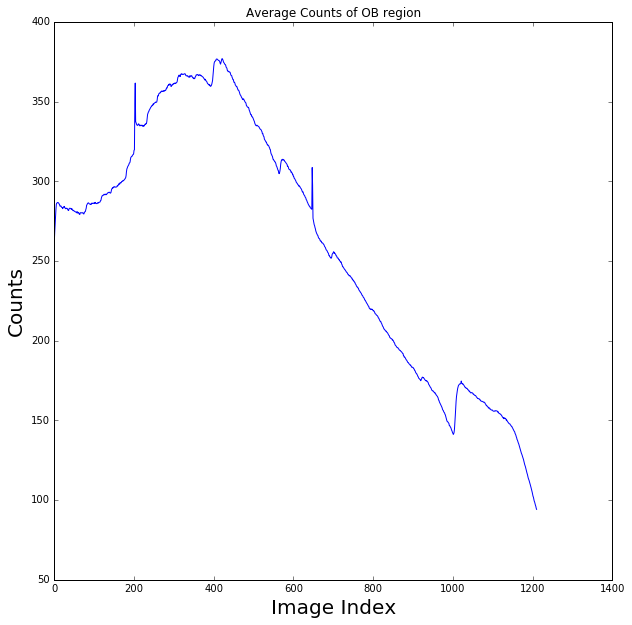

In [36]:
# display to check values
fig2 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(len(new_images)), ob_average_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Average Counts of OB region")



### Calculate cross section formula

In [37]:
cross_section = []
for _index, _image in enumerate(new_images_cropped):
    _mean_ob = ob_average_counts[_index]
    _cross_section = (_mean_ob - _image) / _mean_ob
    cross_section.append(_cross_section)

Check Results !

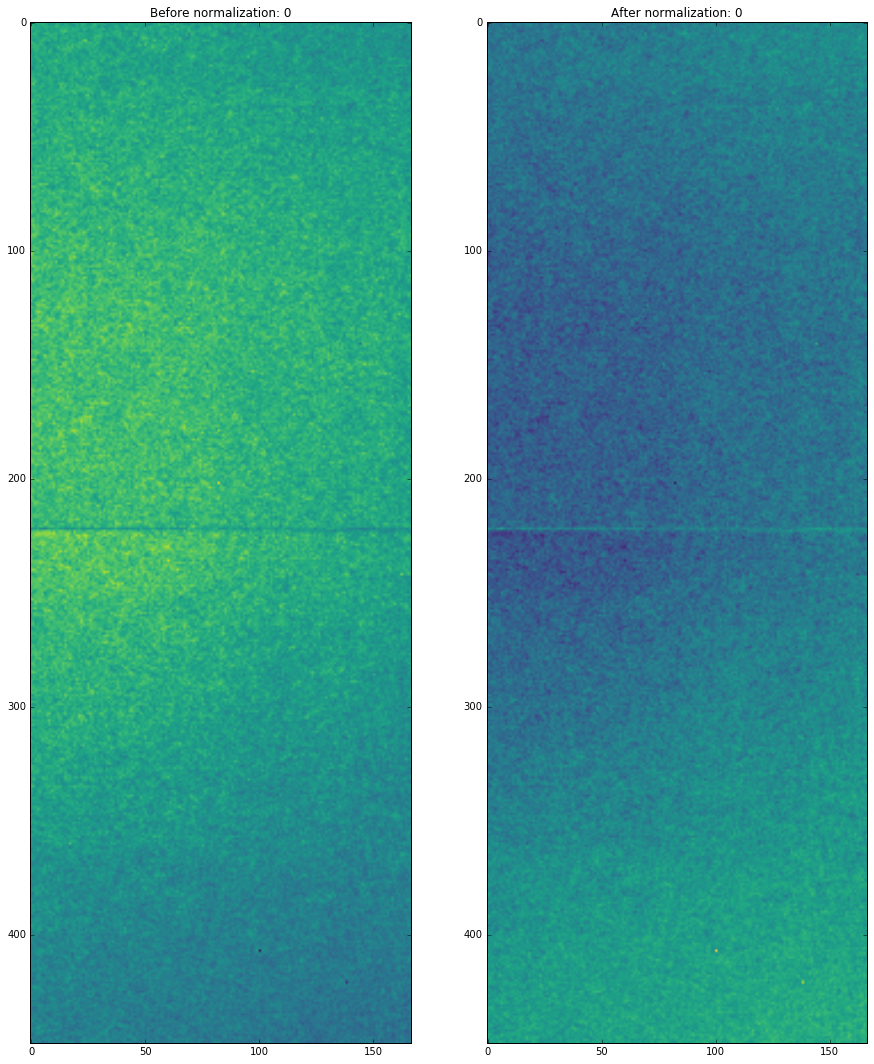

In [38]:
# select Sample region
nbr_images = len(cross_section)

def plot_images_before_and_after_normalization(file_index):
    """Display the sample region before and after normalization"""
    
    _sample_raw = new_images_cropped[file_index]
    _sample_norm = cross_section[file_index]

    fig4 = plt.figure(figsize=(15, 30))

    ax_img1 = plt.subplot(121)
    ax_img1.imshow(_sample_raw, cmap='viridis')
    ax_img1.set_title("Before normalization: %d" %(file_index))
    
    ax_img2 = plt.subplot(122)
    ax_img2.imshow(_sample_norm, cmap='viridis')
    ax_img2.set_title("After normalization: %d" %(file_index))
    
check_normalization = interact(plot_images_before_and_after_normalization,
                   file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, 
                                              description='Image Index'))



## Display Counts vs file index 

### 1. for each pixels

not implemented yet !

### 2. for binning of pixels defined 

In [39]:
# how to bin the pixels
pixel_binning = 10 

Create 2D array of indices that will allow to quickly find the position of a pixel into the rebin array

    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [0,0] [0,0] [0,1] [0,1] [0,2] ...
    [1,0] [1,0] [1,1] [1,1] [1,2] ..
     ...

In [40]:
[height, width] = cross_section[0].shape

In [41]:
print("width: %d" %width)
x_axis_bin = np.arange(0, width, pixel_binning)
print(x_axis_bin)

print("height: %d" %height)
y_axis_bin = np.arange(0, height, pixel_binning)
print(y_axis_bin)

width: 167
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160]
height: 448
[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350
 360 370 380 390 400 410 420 430 440]


Remove range of pixels that don't have a full bin

In [42]:
_bin_cross_section = []
for _image in cross_section:
    _tmp_image = _image[0: y_axis_bin[-1], 0: x_axis_bin[-1]]
    _bin_cross_section.append(_tmp_image)

In [43]:
[bin_height, bin_width] = _bin_cross_section[0].shape

Bin all images

In [44]:
w = widgets.IntProgress()
w.max = len(_bin_cross_section)
display(w)

_bin_images = np.empty(len(_bin_cross_section), dtype=object)

_index = 0
for _image in _bin_cross_section:

    _bin_image = np.zeros((len(y_axis_bin)-1, len(x_axis_bin)-1))
    for _x_index in range(len(x_axis_bin)-1):
        for _y_index in range(len(y_axis_bin)-1):
            _sub_array = _image[y_axis_bin[_y_index]:y_axis_bin[_y_index + 1], 
                                x_axis_bin[_x_index]:x_axis_bin[_x_index + 1]]
            
            _sub_array_mean = np.mean(_sub_array)
            _bin_image[_y_index, _x_index] = _sub_array_mean
            
    _bin_images[_index] = _bin_image
    _index += 1

    w.value = _index


In [45]:
#To check that there is a difference between the images

(44, 16)


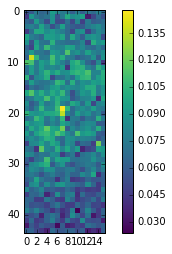

In [46]:
fig9 = plt.figure()
ax_img = plt.subplot()
cax = ax_img.imshow(_bin_images[5] - _bin_images[0], interpolation='nearest', cmap='viridis')
print(_bin_images[5].shape)
fig9.colorbar(cax)

#### check images binned

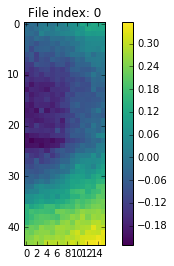

In [47]:
# select Sample region
nbr_images = len(_bin_images)

def plot_images_binned(file_index):
    
    _image = _bin_images[file_index]

    fig8 = plt.figure()

    ax_img1 = plt.subplot(111)
    cax = ax_img1.imshow(_image, cmap='viridis', interpolation='nearest')
    ax_img1.set_title("File index: %d" %file_index)
    cmap = fig8.colorbar(cax)
    
check_normalization = interact(plot_images_binned,
                   file_index = widgets.IntSlider(min=0, max=nbr_images, step=1, value=0, 
                                              description='Image Index'))

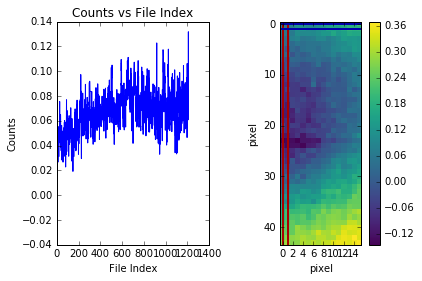

In [48]:
def plot_counts_binned(y_bin, x_bin):
    """Display the x_bin and y_bin counts over all the files"""
    
    _counts_bin = []
    for _image in _bin_images:
        _counts_bin.append(_image[y_bin, x_bin])
    
    fig5 = plt.figure()

    ax_img1 = plt.subplot(121)
    ax_img1.plot(_counts_bin)
    ax_img1.set_title("Counts vs File Index")
    ax_img1.set_xlabel("File Index")
    ax_img1.set_ylabel("Counts")
    
    ax_img2 = plt.subplot(122)
    cax = ax_img2.imshow(_bin_images[int(len(_bin_images)/2)], cmap='viridis', interpolation="nearest")
    ax_img2.axvline(x_bin, color='#aa0000', linewidth=2)
    ax_img2.axvline(x_bin+1, color='#aa0000', linewidth=2)
    ax_img2.axhline(y_bin, color='#0000aa', linewidth=2)
    ax_img2.axhline(y_bin+1, color='#0000aa', linewidth=2)
    ax_img2.set_xlabel("pixel")
    ax_img2.set_ylabel("pixel")
    fig5.colorbar(cax)
    
counts_binned = interact(plot_counts_binned,
                       y_bin = widgets.IntSlider(min=0, max=len(y_axis_bin), step=1, value=0, description='Y bin index'),
                        x_bin = widgets.IntSlider(min=0, max=len(x_axis_bin), step=1, value=0, description='X bin index'))


### 3. for entire image

In [49]:
nbr_images = len(cross_section)

total_counts = []
for _image in cross_section:
    _sum = _image.sum()
    total_counts.append(_sum)

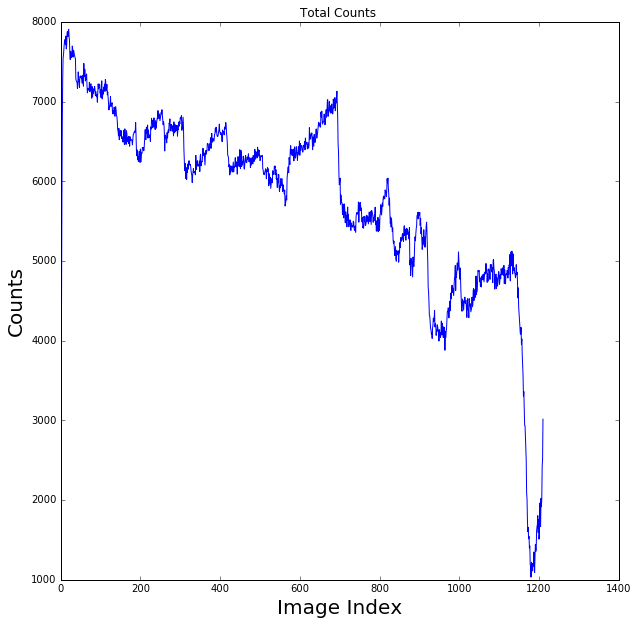

In [50]:
# display to check values
fig5 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(range(nbr_images), total_counts)

ax_img.set_xlabel("Image Index", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_title("Total Counts ")


### Select TOF file and define parameters required to calculate lambda equivalent spectra

In [51]:
import os
lambda_file = os.path.join(default_dir, 'lambda.txt')

#### Load the lambda created in [lambda conversion](create_lambda_array.ipynb)

In [52]:
import sys

In [53]:
sys.path.append('/users/j35/git/braggedge/python')

In [54]:
import neutronbraggedge
from neutronbraggedge.experiment_handler import *

In [55]:
_lambda_handler = LambdaWavelength(filename = lambda_file )

In [56]:
lambda_array = _lambda_handler.lambda_array
lambda_range = lambda_array[file_index_start: file_index_end]
print(len(lambda_range))
print(len(cross_section))

1211
1211


### Counts vs Lambda

     1. for entire images

In [57]:
lambda_np = np.array(lambda_range)
lambda_angstroms = lambda_np * 1.e10

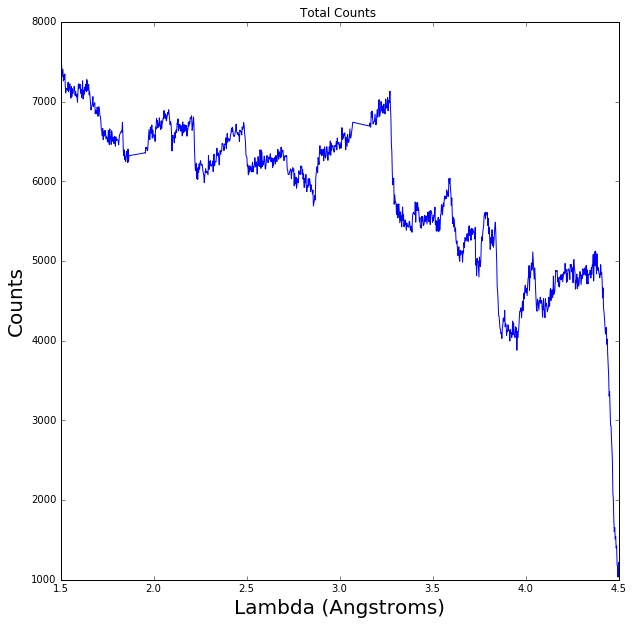

In [58]:
# display to check values
fig10 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([1.5, 4.5])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total Counts ")

### Calculate  for the material, the set of 'hkl' and display them on each Counts vs lambda plots

In [59]:
from neutronbraggedge.braggedge import BraggEdge

In [60]:
_handler = BraggEdge(material='Si', number_of_bragg_edges=10, use_local_metadata_table=True)

In [61]:
_handler.hkl

[[1, 1, 1],
 [2, 0, 0],
 [2, 2, 0],
 [2, 2, 2],
 [3, 1, 1],
 [3, 3, 1],
 [3, 3, 3],
 [4, 0, 0],
 [4, 2, 0],
 [4, 2, 2]]

In [62]:
_handler.bragg_edges

[6.2718610519558977,
 5.4315910000000001,
 3.8407148287318207,
 3.1359305259779489,
 3.2753726112129593,
 2.4921848706994765,
 2.0906203506519656,
 2.7157955,
 2.4290813403952121,
 2.2174377402489043]

### display bragg edges calculated on top of Total_counts vs lambda

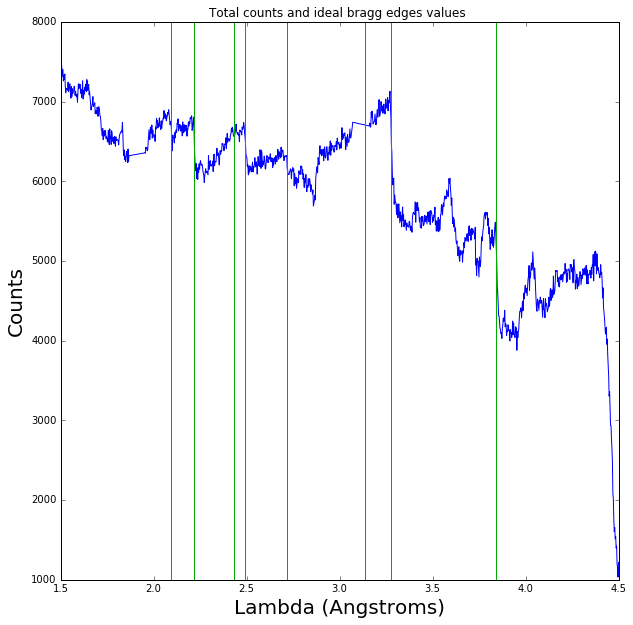

In [63]:
# display to check values
fig11 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([1.5, 4.5])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total counts and ideal bragg edges values ")

for _value in _handler.bragg_edges:
    ax_img.axvline(_value, color="#00aa00", linewidth=1)


### Add labels of crystal orientation on top of plot 

In [64]:
_hkl_string = []
for _hkl in _handler.hkl:
    _hkl_s = ",".join(str(x) for x in _hkl)
    _hkl_string.append(_hkl_s)
print(_hkl_string)

['1,1,1', '2,0,0', '2,2,0', '2,2,2', '3,1,1', '3,3,1', '3,3,3', '4,0,0', '4,2,0', '4,2,2']


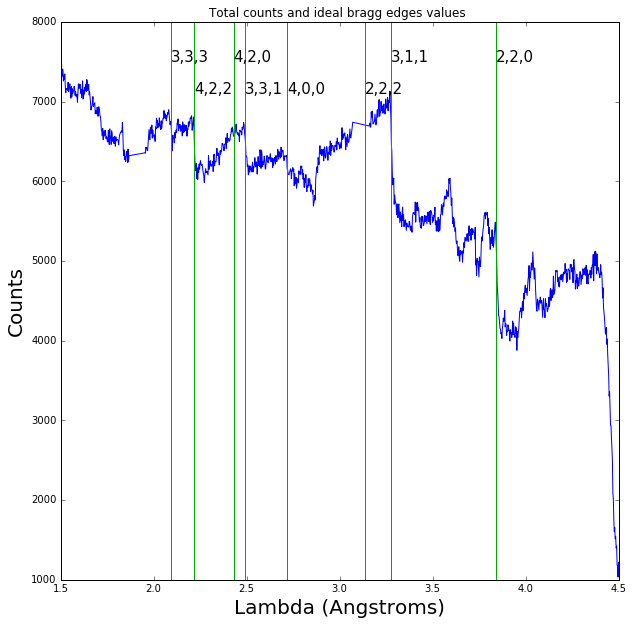

In [65]:
# display to check values
fig11 = plt.figure(figsize=(10, 10))
ax_img = plt.subplot(111)
ax_img.plot(lambda_angstroms, total_counts)

min_x = 1.5
max_x = 4.5

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("Counts", fontsize=20)
ax_img.set_xlim([min_x, max_x])
#ax_img.set_ylim([1e5, 1.15e5])
ax_img.set_title("Total counts and ideal bragg edges values ")
     
y_offset = 200
y_value = 7300
for _index, _value in enumerate(_handler.bragg_edges):
    if _value > max_x:
        continue
    ax_img.axvline(_value, color="#00aa00", linewidth=1)
    ax_img.text(_value, y_value + ((-1)**_index)*y_offset, _hkl_string[_index], fontsize=15)
    

# Trying John's method

We gonna try to detect the position of the peaks using primary differential

In [66]:
len_x_axis = len(total_counts)
print(len_x_axis)

1211


    y_diff[0] = (y[1]-y[0])/(x[1]-x[0])
    x_diff[0] = (x[1] + x[0]) / 2.


In [67]:
x_axis = []
y_axis = []
for i in range(1, len_x_axis):
    
    # x_axis
    _x_left = lambda_angstroms[i-1]
    _x_right = lambda_angstroms[i]
    _new_x = np.mean([_x_left, _x_right])
    x_axis.append(_new_x)
    
    # y_axis
    _y_left = total_counts[i-1]
    _y_right = total_counts[i]
    _new_y = (_y_right - _y_left) / (_x_right - _x_left)
    y_axis.append(_new_y)

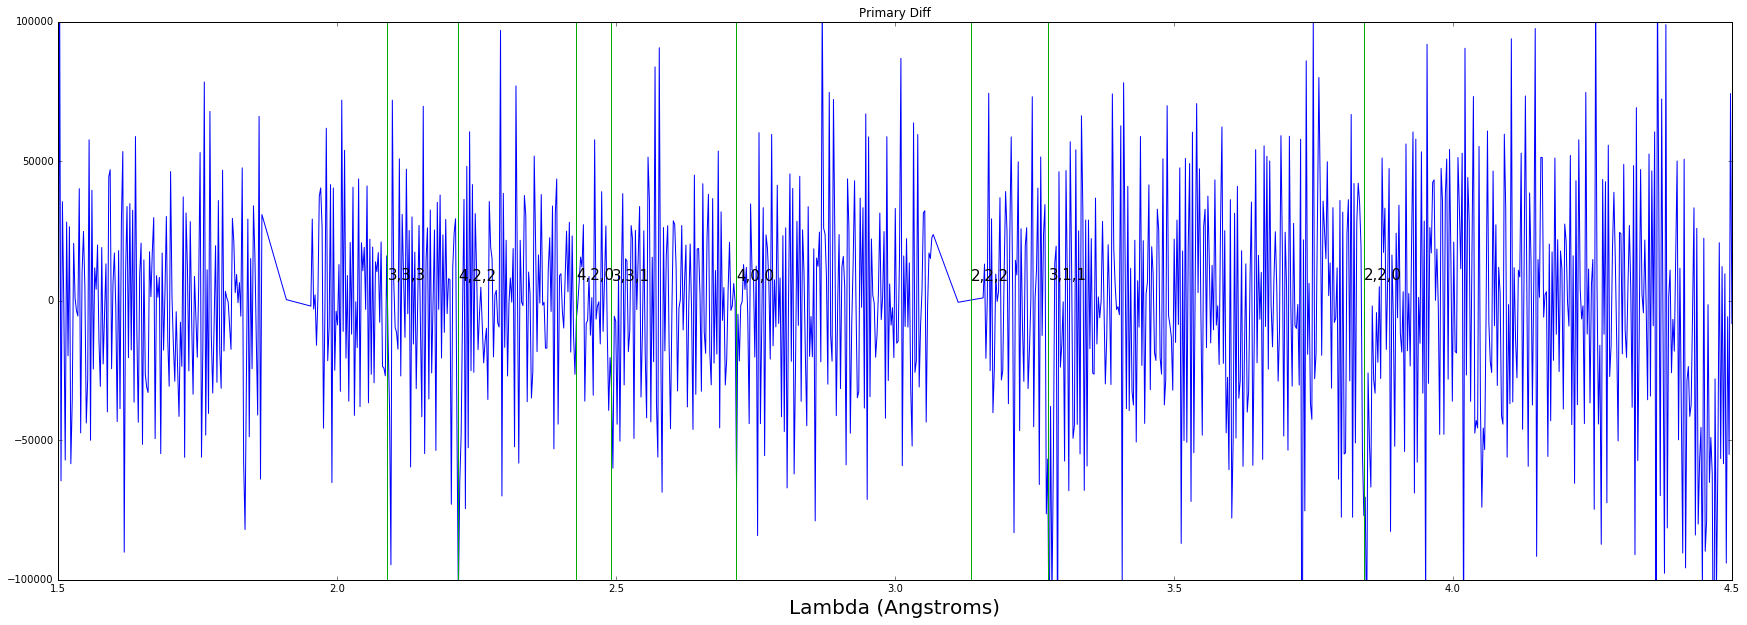

In [75]:
# display to check values
fig12 = plt.figure(figsize=(30, 10))
ax_img = plt.subplot(111)
ax_img.plot(x_axis, y_axis)

min_x = 1.5
max_x = 4.5

ax_img.set_xlabel("Lambda (Angstroms)", fontsize=20)
ax_img.set_ylabel("", fontsize=20)
ax_img.set_xlim([min_x, max_x])
ax_img.set_ylim([-1e5, 1.e5])
ax_img.set_title("Primary Diff")
     
y_offset = 200
y_value = 7300
for _index, _value in enumerate(_handler.bragg_edges):
    if _value > max_x:
        continue
    ax_img.axvline(_value, color="#00aa00", linewidth=1)
    ax_img.text(_value, y_value + ((-1)**_index)*y_offset, _hkl_string[_index], fontsize=15)
    